# Assingment 1
### by Simhadri Mohana Kushal

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [45]:
data.shape

(891, 15)

In [46]:
data.isnull().sum()/891 * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

* 19% of age data is missing which can be filed be replacing it with the mean age
* 0.22% of embarked and embark_town data is missing which can be fillde by the mode value of embarked
* 77% of deck data is missing, thus we will drop this data from the dataset

In [47]:
data['age'] = data['age'].fillna(data['age'].mean())

In [48]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [49]:
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [50]:
data = data.drop(['deck'], axis=1)

In [51]:
data.isnull().sum()/891 * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

## Exploratory Data Analysis

In [52]:
target = 'alive'
cat_feats = ['pclass', 'sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']
num_feats = ['age', 'sibsp', 'parch', 'fare', ]

#### Target Class

Text(0.5, 1.0, 'Target distribution')

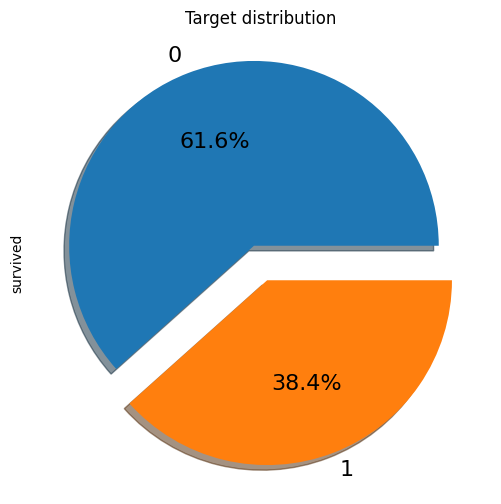

In [53]:
plt.figure(figsize=(6,6))
data['survived'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

#### Continuous Data

Text(0.5, 0, 'Age (years)')

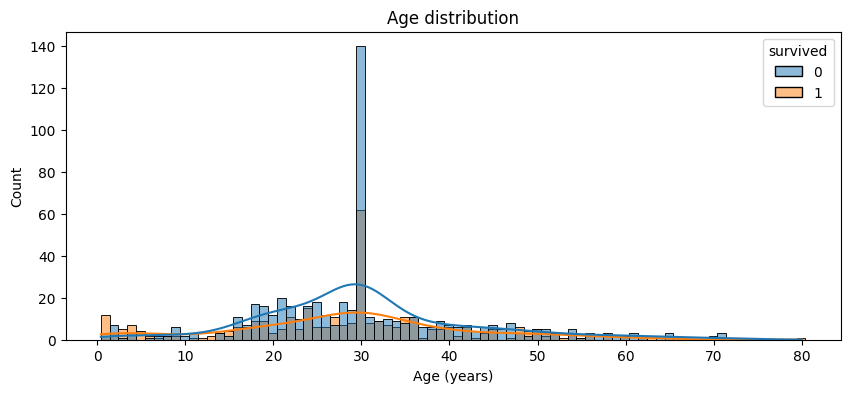

In [54]:
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='age', hue='survived', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

* their seems to be no relation between age and the probability to survive

#### Categorical Data

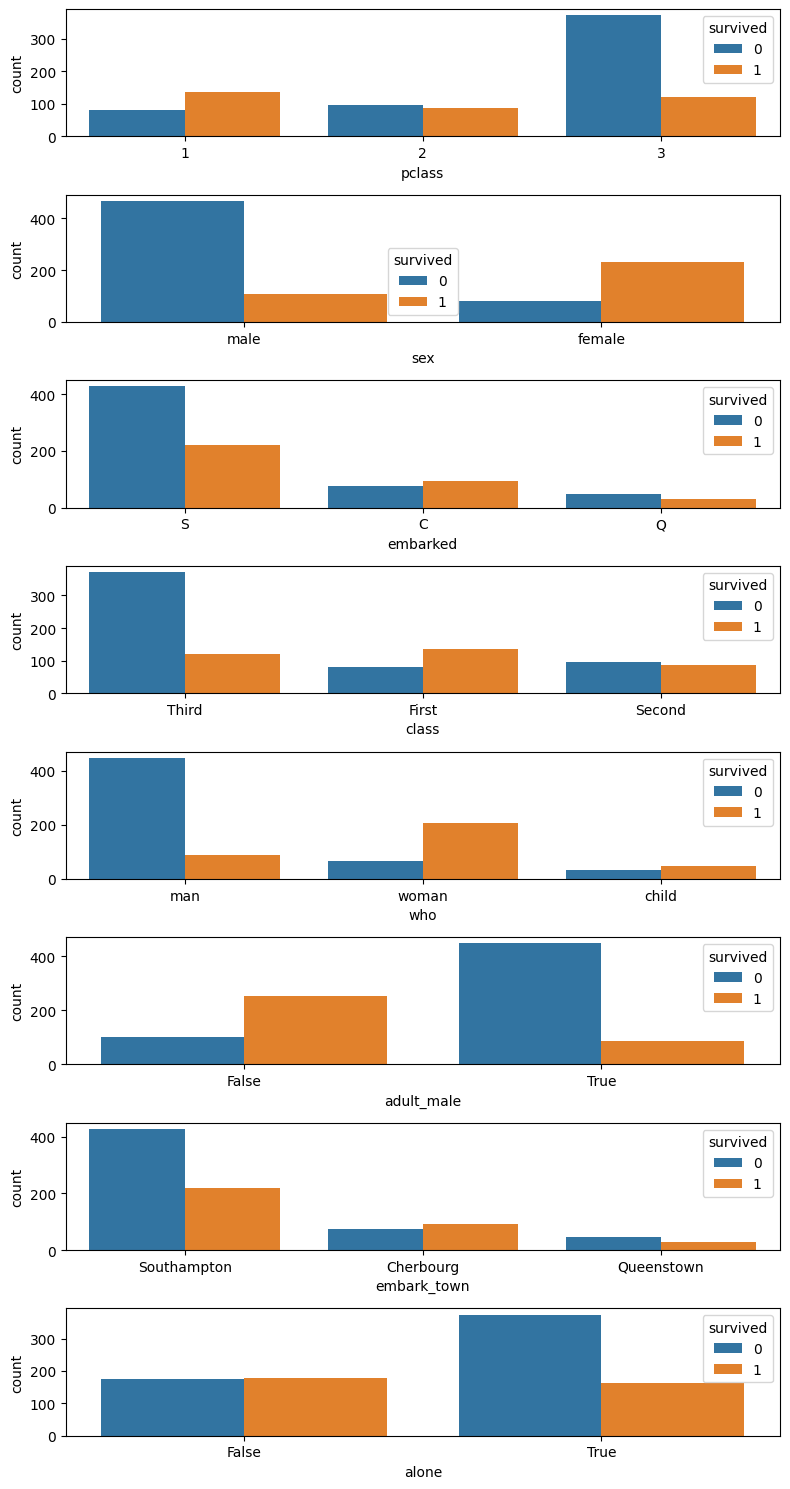

In [55]:
fig=plt.figure(figsize=(8,15))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(8,1,i+1)
    sns.countplot(data=data, x=var_name, axes=ax, hue='survived')
fig.tight_layout()  # Improves appearance a bit
plt.show()

C:\Users\Simhadri Kushal\AppData\Local\Temp\ipykernel_112176\4009627306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

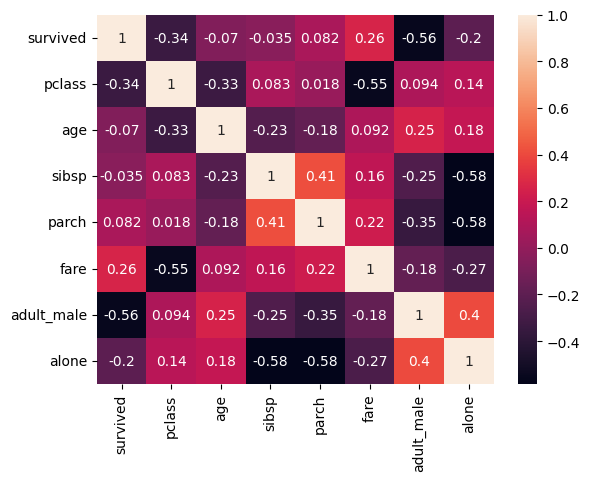

In [56]:
corr = data.corr()
sns.heatmap(corr, annot=True)

### Identifying and replacing all the outliers

<Axes: xlabel='fare'>

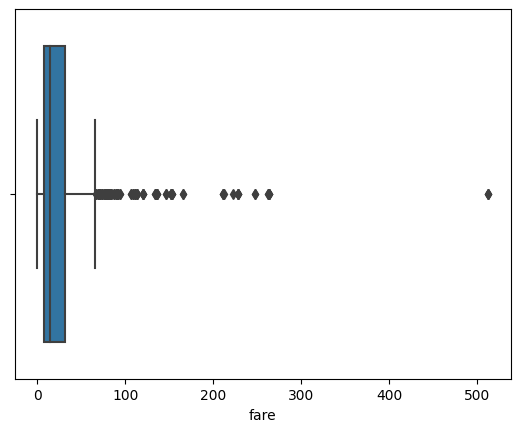

In [57]:
sns.boxplot(x = data['fare'])

In [58]:
def replace_numerical_outliers(df, column_name, z_thresh=3):
    median = df[column_name].median()
    std = df[column_name].std()
    outliers = ((df[column_name] - median).abs()) > z_thresh*std
    df[outliers] = np.nan
    df[column_name].fillna(median, inplace=True)

<Axes: xlabel='fare'>

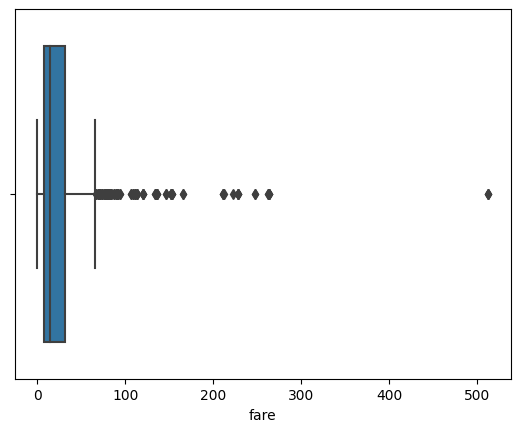

In [59]:
#replace_numerical_outliers(data, 'fare')
sns.boxplot(x = data['fare'])

In [60]:
data.shape

(891, 14)

## Data PreProcessing
Label Endocing all the categorical data

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [62]:
from sklearn.preprocessing import LabelEncoder
col = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
lab = LabelEncoder()
for i in col:
    data[i] = lab.fit_transform(data[i])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    int64  
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    int64  
dtypes: float64(2), int32(6), int64(6)
memory usage: 76.7 KB


In [64]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


## Spliting and Scaling Data

In [65]:
X = data[['pclass','sex','age','sibsp','parch','fare','embarked','class','who','adult_male','embark_town','alive','alone']]
y = data['survived']

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(X)
print(scaledX)

[[ 0.82737724  0.73769513 -0.5924806  ...  0.58595414 -0.78927234
  -1.2316449 ]
 [-1.56610693 -1.35557354  0.63878901 ... -1.9423032   1.2669898
  -1.2316449 ]
 [ 0.82737724 -1.35557354 -0.2846632  ...  0.58595414  1.2669898
   0.81192233]
 ...
 [ 0.82737724 -1.35557354  0.         ...  0.58595414 -0.78927234
  -1.2316449 ]
 [-1.56610693  0.73769513 -0.2846632  ... -1.9423032   1.2669898
   0.81192233]
 [ 0.82737724  0.73769513  0.17706291 ... -0.67817453 -0.78927234
   0.81192233]]


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, shuffle=True)

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 1.0
Confusion Matrix:
[[134   0]
 [  0  89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        89

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

